<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>

<div style="font-size:25px">
Name - Ravi Kumar Singh  
   <br>
    <br>
Task - Exploratory Data Analysis - Retail 
    <br>
    <br>
Objective - As a business manager, try to find out the weak areas where you can
work to make more profit.
</div>

<div style="font-size:20px">
Importing libraries used for this task
</div>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
df=pd.read_csv('SampleSuperstore.csv')

In [14]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [16]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
df.duplicated().sum()

17

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.drop('Postal Code',inplace=True,axis=1)

In [20]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [21]:
cateogries=df['Category'].unique()

In [22]:
gk=df.groupby(['Category','Sub-Category']).agg({'Sales':np.sum,'Profit':np.sum,'Discount':np.sum})

In [23]:
gk=gk.reset_index()

In [24]:
gk

,Category,Sub-Category,Sales,Profit,Discount
0,Furniture,Bookcases,114879.9963,-3472.5560,48.14
1,Furniture,Chairs,327777.7610,26567.1278,104.70
2,Furniture,Furnishings,91683.0240,13052.7230,132.40
3,Furniture,Tables,206965.5320,-17725.4811,83.35
4,Office Supplies,Appliances,107532.1610,18138.0054,77.60
5,Office Supplies,Art,27107.0320,6524.6118,59.60
6,Office Supplies,Binders,203409.1690,30228.0003,566.20
7,Office Supplies,Envelopes,16476.4020,6964.1767,20.40
8,Office Supplies,Fasteners,3024.2800,949.5182,17.80
9,Office Supplies,Labels,12444.9120,5526.3820,25.00


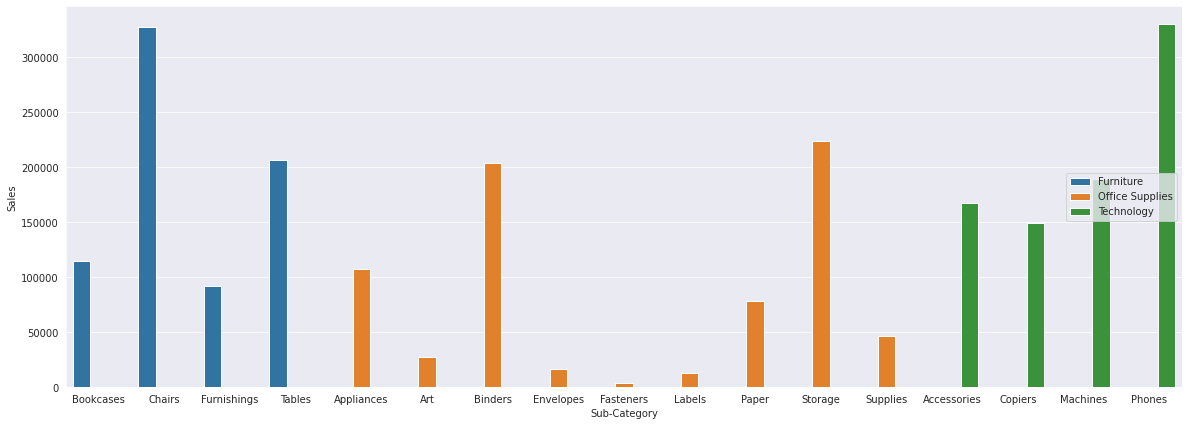

In [25]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='Sub-Category', y='Sales', hue='Category', data=gk,ax=ax)
plt.legend(loc='center right')

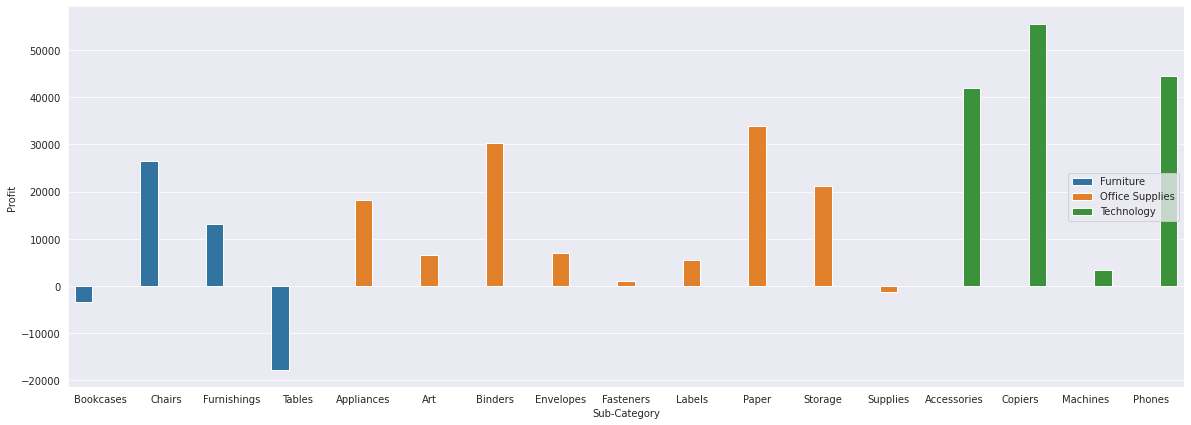

In [26]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='Sub-Category', y='Profit', hue='Category', data=gk,ax=ax)
plt.legend(loc='center right')

In [27]:
sk=df.groupby(['Category','Ship Mode']).agg({'Ship Mode':np.size})
sk['Count']=sk['Ship Mode']
sk.drop('Ship Mode',axis=1,inplace=True)
sk=sk.reset_index()

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

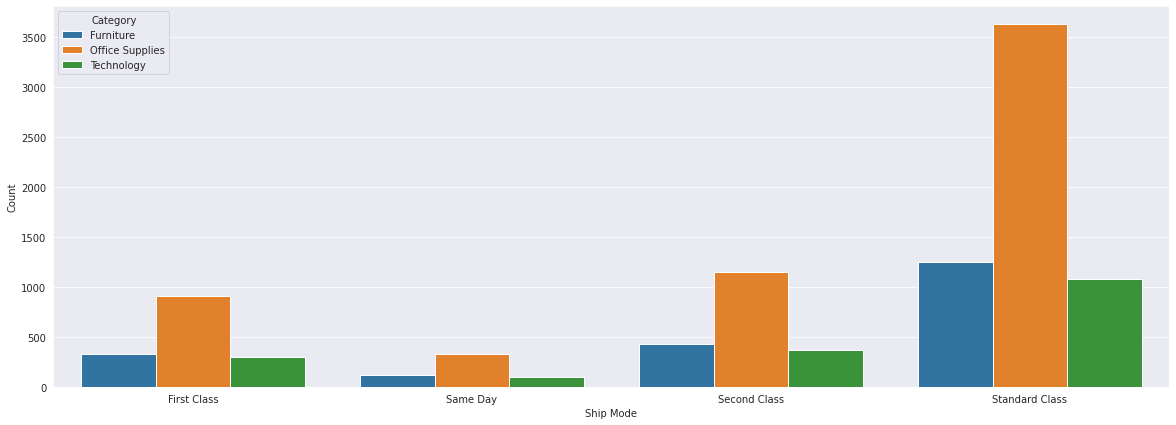

In [28]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='Ship Mode',y='Count',hue='Category',ax=ax,data=sk)

In [29]:
tk=df.groupby(['Segment','Sub-Category']).agg({'Sales':np.sum,'Profit':np.sum})

In [30]:
tk=tk.reset_index()

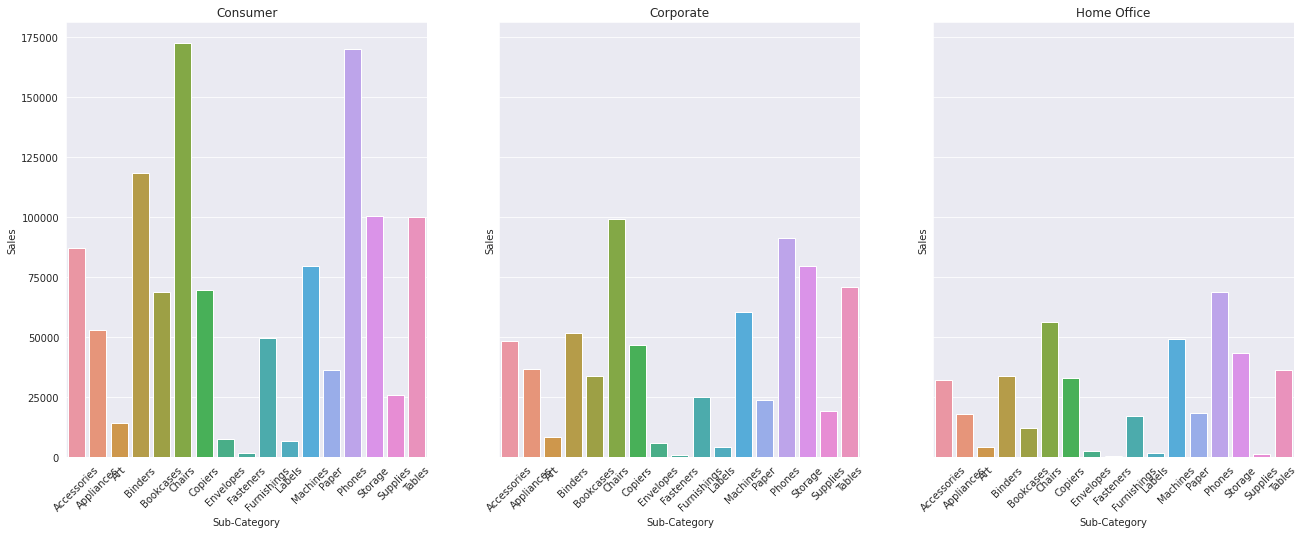

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(22,8),sharex='col', sharey='row')
plt.subplot(1,3,1)
sns.barplot(x='Sub-Category',y='Sales',data=tk[tk['Segment']=='Consumer'])
plt.xticks(rotation=45)
plt.title('Consumer')
plt.subplot(1,3,2)
sns.barplot(x='Sub-Category',y='Sales',data=tk[tk['Segment']=='Corporate'])
plt.xticks(rotation=45)
plt.title('Corporate')
plt.subplot(1,3,3)
sns.barplot(x='Sub-Category',y='Sales',data=tk[tk['Segment']=='Home Office'])
plt.xticks(rotation=45)
plt.title('Home Office')
plt.show()
#

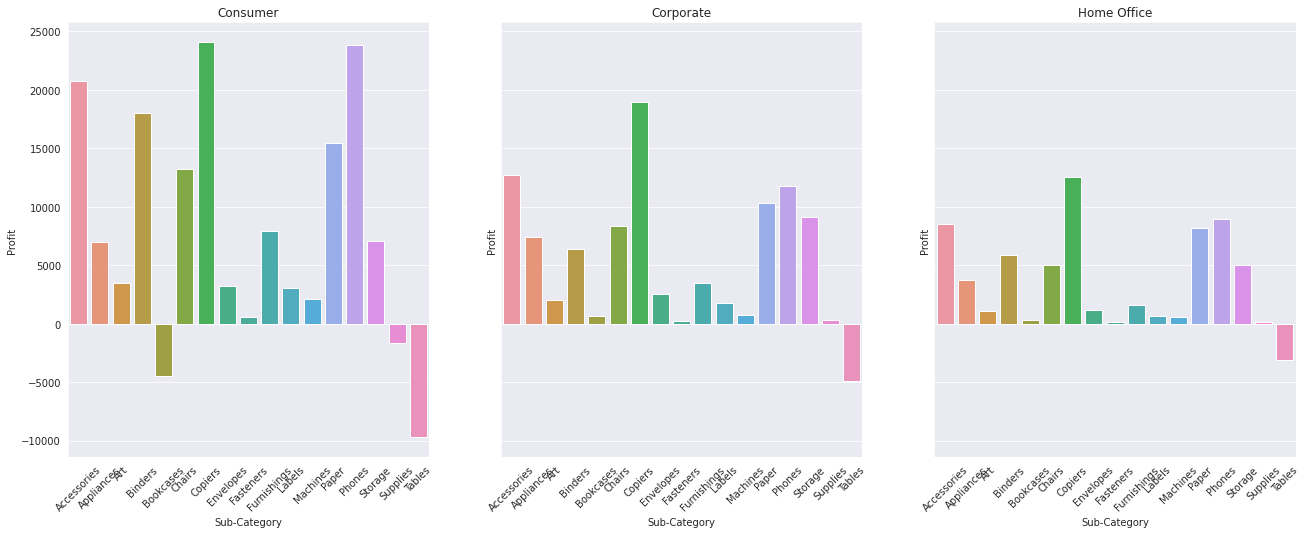

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(22,8),sharex='col', sharey='row')
plt.subplot(1,3,1)
sns.barplot(x='Sub-Category',y='Profit',data=tk[tk['Segment']=='Consumer'])
plt.xticks(rotation=45)
plt.title('Consumer')
plt.subplot(1,3,2)
sns.barplot(x='Sub-Category',y='Profit',data=tk[tk['Segment']=='Corporate'])
plt.xticks(rotation=45)
plt.title('Corporate')
plt.subplot(1,3,3)
sns.barplot(x='Sub-Category',y='Profit',data=tk[tk['Segment']=='Home Office'])
plt.xticks(rotation=45)
plt.title('Home Office')
plt.show()
#

In [33]:
reg=df.groupby(['Region','Sub-Category']).agg({'Sales':np.sum,'Profit':np.sum})

In [34]:
reg=reg.reset_index()

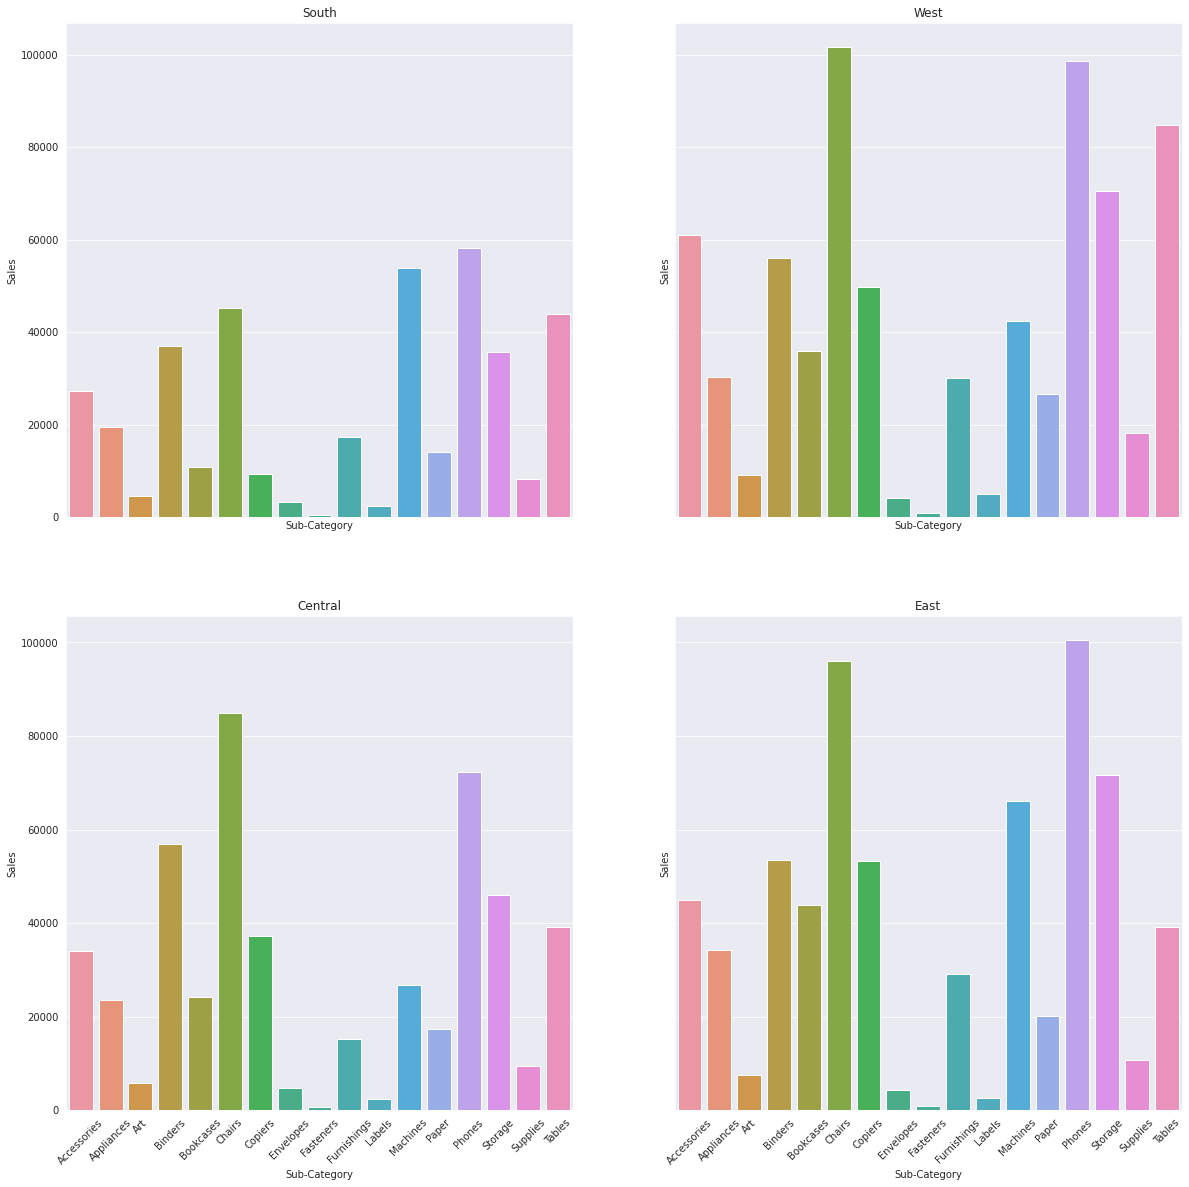

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20,20),sharex='col', sharey='row')
plt.subplot(2,2,1)
sns.barplot(x='Sub-Category',y='Sales',data=reg[reg['Region']=='South'])
plt.xticks(rotation=45)
plt.title('South')
plt.subplot(2,2,2)
sns.barplot(x='Sub-Category',y='Sales',data=reg[reg['Region']=='West'])
plt.xticks(rotation=45)
plt.title('West')
plt.subplot(2,2,3)
sns.barplot(x='Sub-Category',y='Sales',data=reg[reg['Region']=='Central'])
plt.xticks(rotation=45)
plt.title('Central')
plt.subplot(2,2,4)
sns.barplot(x='Sub-Category',y='Sales',data=reg[reg['Region']=='East'])
plt.xticks(rotation=45)
plt.title('East')
plt.show()

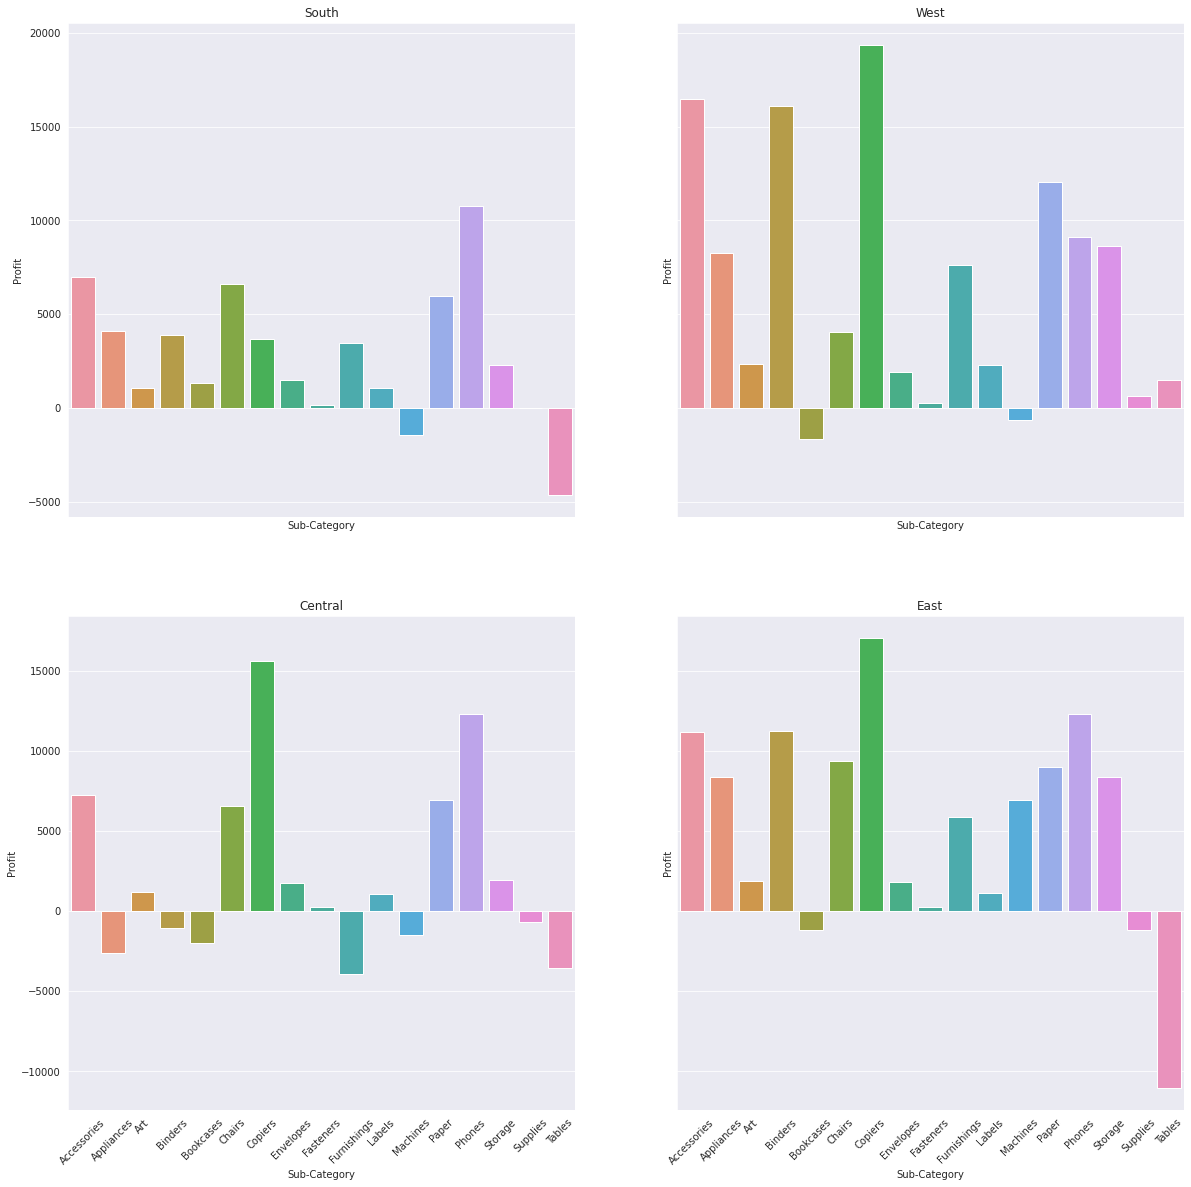

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(20,20),sharex='col', sharey='row')
plt.subplot(2,2,1)
sns.barplot(x='Sub-Category',y='Profit',data=reg[reg['Region']=='South'])
plt.xticks(rotation=45)
plt.title('South')
plt.subplot(2,2,2)
sns.barplot(x='Sub-Category',y='Profit',data=reg[reg['Region']=='West'])
plt.xticks(rotation=45)
plt.title('West')
plt.subplot(2,2,3)
sns.barplot(x='Sub-Category',y='Profit',data=reg[reg['Region']=='Central'])
plt.xticks(rotation=45)
plt.title('Central')
plt.subplot(2,2,4)
sns.barplot(x='Sub-Category',y='Profit',data=reg[reg['Region']=='East'])
plt.xticks(rotation=45)
plt.title('East')
plt.show()

In [37]:
st=df.groupby(['State','Sub-Category']).agg({'Sales':np.sum,'Profit':np.sum})

In [38]:
st=st.reset_index()

In [39]:
st['Sales'].mean()

3500.298155945122

In [40]:
loss=st[(st['Profit']<0) & (st['Sales']>3500)]

In [41]:
len(loss['State'].unique())

11

In [51]:
def state_sale_plot():
    states=loss['State'].unique()
    fig, ax = plt.subplots(4, 3, figsize=(20,20), sharey='row')
    fig.tight_layout(pad=5.0)
    for i in range(1,len(states)):
        plt.subplot(4,3,i)
        sns.barplot(x='Sales',y='Sub-Category',data=loss[loss['State']==states[i]])
        plt.xticks(rotation=45)
        plt.title(states[i])
    plt.show()

In [52]:
def state_loss_plot():
    states=loss['State'].unique()
    fig, ax = plt.subplots(4, 3, figsize=(20,20), sharey='row')
    fig.tight_layout(pad=5.0)
    for i in range(1,len(states)):
        plt.subplot(4,3,i)
        sns.barplot(x='Profit',y='Sub-Category',data=loss[loss['State']==states[i]])
        plt.xticks(rotation=45)
        plt.title(states[i])
    plt.show()

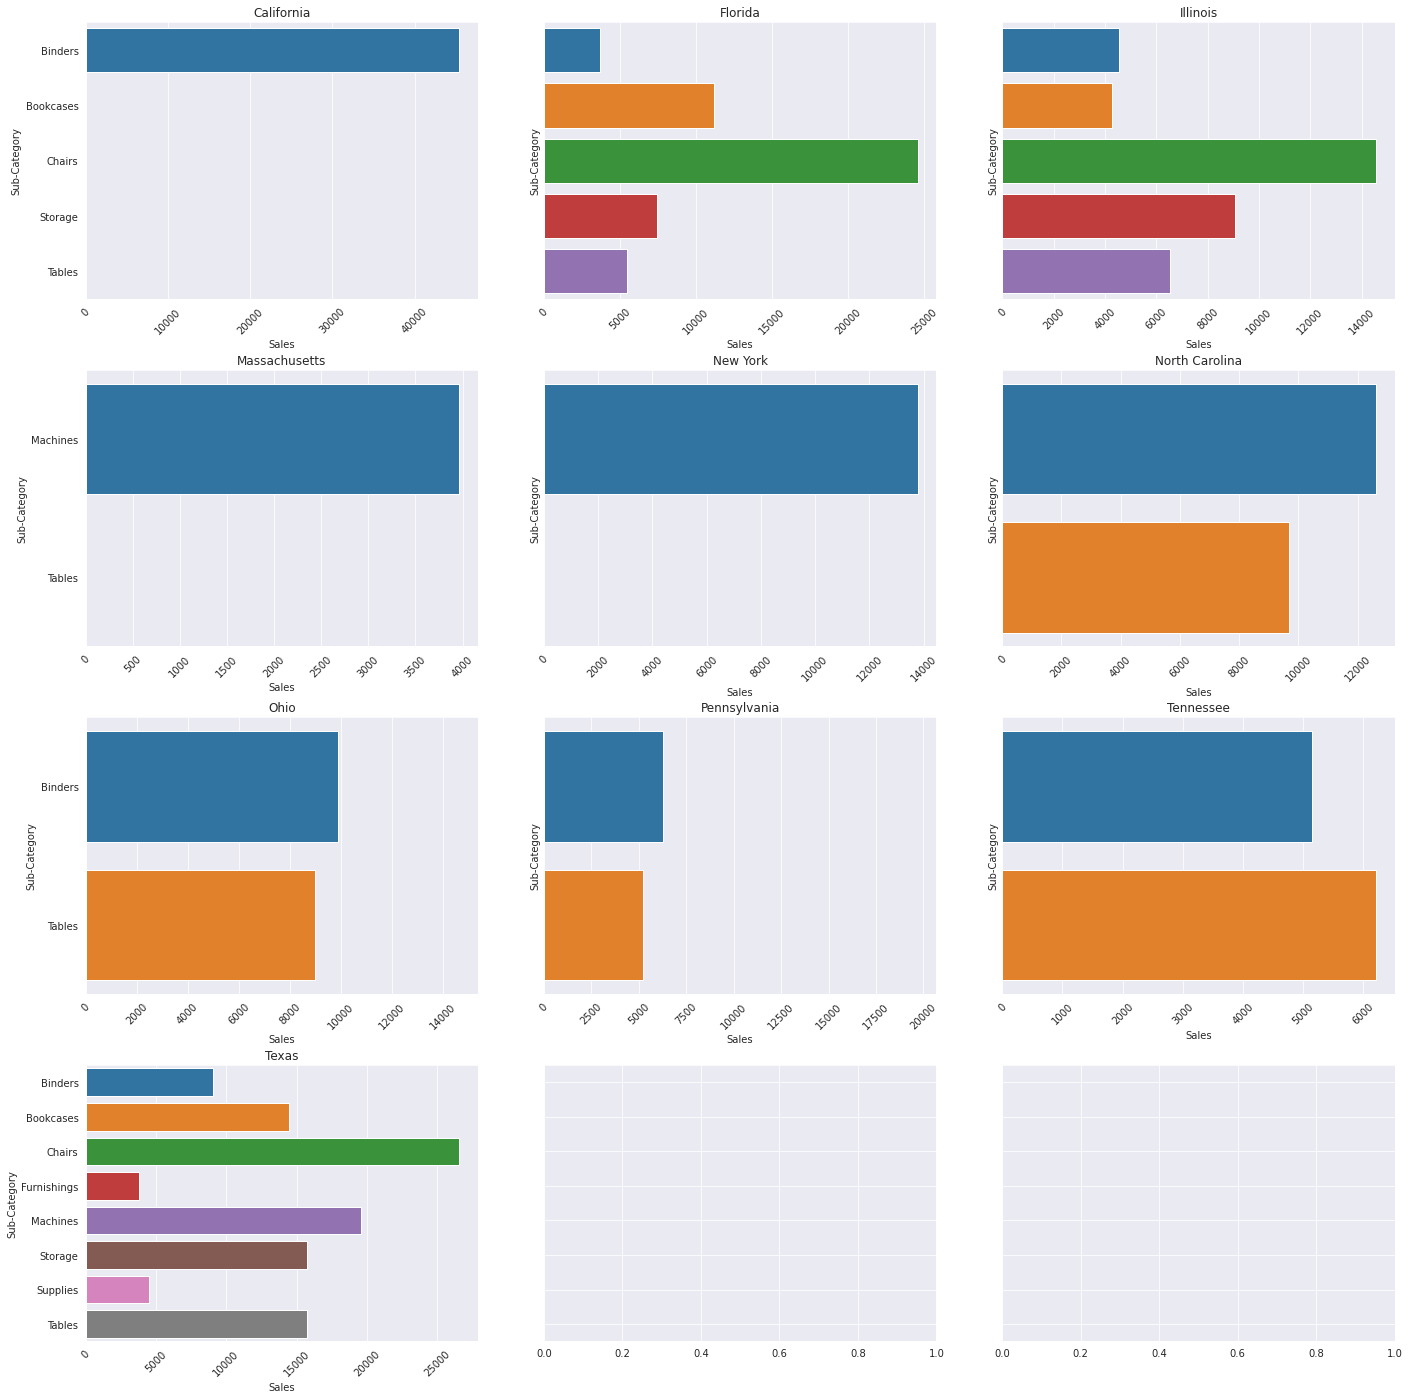

In [54]:
state_sale_plot()

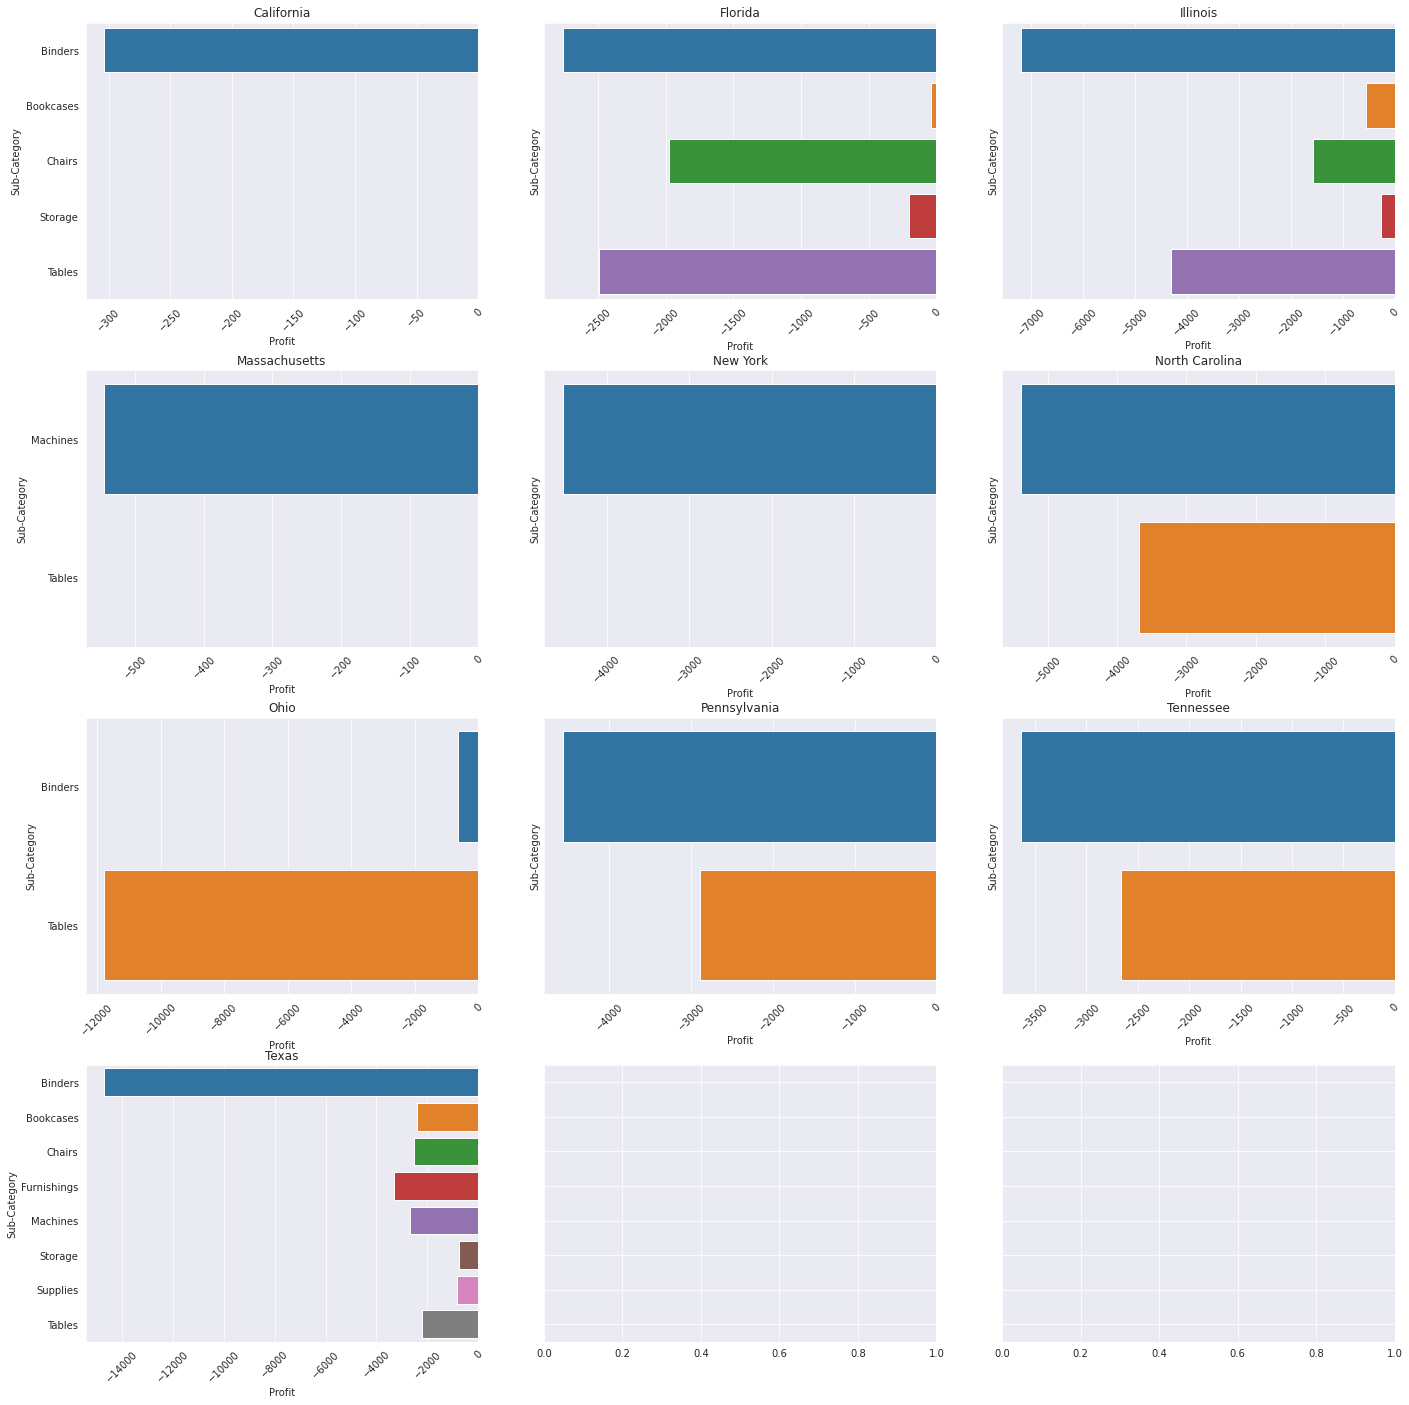

In [55]:
state_loss_plot()

<div style="font-size: 25px">
Result

<div style="font-size:20px">
Overall<br>
Tables has made no profit and has maximum loss 
<br>

</div>

<div style="font-size:20px">
Region And Segments wise
</div>

<div style="font-size:20px">
In consumer section table and binders are facing loss
while table is facing loss in rest of the segment<br>
South part of the country has the least sale and central has the maximum loss<br>
Sales must be increased in south region by giving on day delievery service and discounts<br>
Central area has loss in bookcases,binders,machines,labels because of having low sales <br>
</div>

<div style="font-size:20px">
State Wise
</div>

<div style="font-size:20px">
pennsylvania has low sales resulting in loss
<br>
Other states have loss where there were low sales in various categories 
</div>